In [ ]:
import pandas as pd
data = pd.read_excel("CDR_6_MRIfull.xlsx")
data

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,1,0,0,0,0,0,0,0,0,...,0.022229,0.002573,0.012313,0.001690,0.013390,0.002362,0.008422,0.001901,0.000727,0.001242
1,2,1,0,0,0,0,0,0,0,0,...,0.024551,0.002161,0.009114,0.001402,0.011982,0.001958,0.007428,0.001745,0.001002,0.001436
2,2,1,0,0,0,0,0,0,0,0,...,0.023044,0.002528,0.011245,0.001631,0.014259,0.002555,0.009018,0.001929,0.001011,0.001175
3,1,1,0,0,0,0,0,0,0,1,...,0.025236,0.001905,0.010176,0.001439,0.014644,0.001889,0.008720,0.001722,0.001107,0.001664
4,2,1,0,0,0,0,0,0,0,0,...,0.024523,0.001865,0.009781,0.001139,0.014733,0.001973,0.008312,0.001255,0.000858,0.001543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0,0,0,0,0,0,0,2,...,0.025420,0.002925,0.011830,0.001772,0.012750,0.002526,0.009636,0.002026,0.001097,0.001902
1596,2,1,0,0,0,0,0,0,0,0,...,0.024433,0.002743,0.010769,0.001696,0.013166,0.002124,0.007746,0.002225,0.000581,0.001011
1597,1,2,2,2,2,2,2,2,2,7,...,0.028646,0.002051,0.010201,0.001462,0.012770,0.001882,0.010078,0.001834,0.000549,0.001365
1598,2,1,0,0,0,0,0,0,0,2,...,0.026394,0.002981,0.009892,0.001980,0.014052,0.002180,0.009527,0.002300,0.001162,0.001734


**TASK-12A: Please use linear (PCA) and nonlinear (LLE, ISOMAP) dimensionality reduction methods using MR metrics to visualize the patients with their different CDRGLOB values/levels to understand whether there are visible patterns. Please first only use the first two dimensions in your visualizations.**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA


In [ ]:
#PCA
X = data.iloc[:,15:]
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

In [ ]:
y = data["CDRGLOB"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1595    0
1596    0
1597    2
1598    0
1599    1
Name: CDRGLOB, Length: 1600, dtype: int64

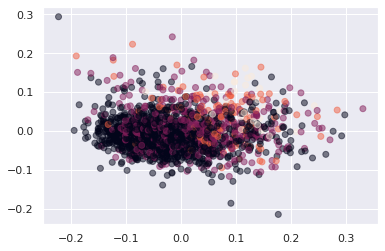

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5, c=y);

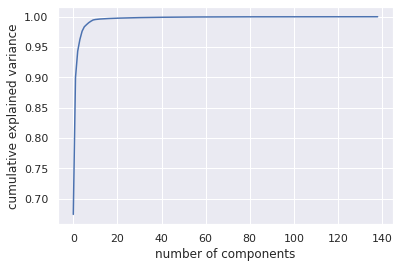

In [ ]:
pca_all = PCA().fit(X)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca_95 = PCA(0.95).fit(X)
pca_95.n_components_

4

In [ ]:
X_pca_95 = pca_95.transform(X)

In [ ]:
X_pca_95

array([[-0.19439123,  0.00136327, -0.00227371, -0.01009811],
       [-0.17377926, -0.01903505, -0.00072734, -0.00571283],
       [-0.16942477, -0.01570903,  0.02288737, -0.00149719],
       ...,
       [ 0.28352587,  0.05382694, -0.01935954, -0.007212  ],
       [ 0.2973535 ,  0.04145494,  0.03156549,  0.03075551],
       [ 0.33026816,  0.05730002,  0.01067404,  0.02898164]])

In [ ]:
#LLE
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='modified',
                               eigen_solver='dense')
LLE_out = model.fit_transform(X)

In [ ]:
LLE_out

array([[-0.03664861, -0.00380327],
       [-0.04060773,  0.00408248],
       [-0.03465421,  0.0008872 ],
       ...,
       [ 0.05202057,  0.00599364],
       [ 0.05508067,  0.00705526],
       [ 0.05729515,  0.00726308]])

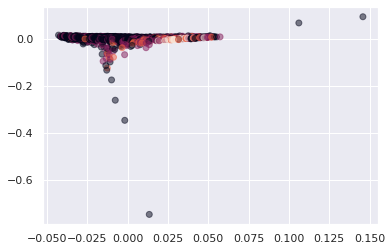

In [ ]:
plt.scatter(LLE_out[:,0],LLE_out[:,1],alpha=0.5,c=y)

In [ ]:
#ISOMAP
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
fit= model.fit_transform(X)
fit.shape

(1600, 2)

In [ ]:
fit

array([[-3.17789830e-01, -5.58629975e-03],
       [-2.90162309e-01, -2.63786518e-02],
       [-2.91161057e-01, -4.07830760e-04],
       ...,
       [ 4.22455773e-01,  9.24995935e-02],
       [ 4.43997990e-01,  1.04588893e-01],
       [ 4.72331512e-01,  1.07730634e-01]])

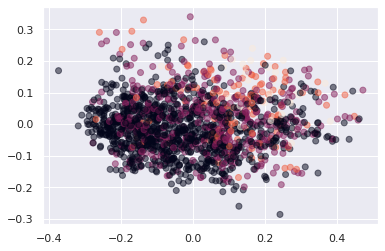

In [ ]:
plt.scatter(fit[:, 0], fit[:, 1], alpha=0.5, c=y);

**TASK-12B: Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 
3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier
For this task, please use them with their default parameter values.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
X = data.iloc[:,15:]
pca = PCA(7)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(projected, y, test_size=0.25, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy for PCA and Gaussian Naive Bayes:",accuracy_score(y_test, y_pred))

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy for PCA and Support Vector Machines:",accuracy_score(y_test, y_pred))


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy for PCA and Random Forest Classifier:",accuracy_score(y_test, y_pred))


Accuracy for PCA and Gaussian Naive Bayes: 0.6525
Accuracy for PCA and Support Vector Machines: 0.6625
Accuracy for PCA and Random Forest Classifier: 0.67


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=10, n_components=7, method='modified',
                               eigen_solver='dense')
X = data.iloc[:,15:]
LLE_out = model.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(LLE_out, y, test_size=0.25, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy for LLE and Gaussian Naive Bayes:",accuracy_score(y_test, y_pred))

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy for LLE and Support Vector Machines:",accuracy_score(y_test, y_pred))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy for LLE and Random Forest Classifier",accuracy_score(y_test, y_pred))

Accuracy for LLE and Gaussian Naive Bayes: 0.63
Accuracy for LLE and Support Vector Machines: 0.65
Accuracy for LLE and Random Forest Classifier 0.6025


In [ ]:
#ISOMAP
from sklearn.manifold import Isomap
X = data.iloc[:,15:]
model = Isomap(n_components=7)
fit= model.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(fit, y, test_size=0.25, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy for Isomap and Gaussian Naive Bayes:",accuracy_score(y_test, y_pred))

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy for Isomap and Support Vector Machines:",accuracy_score(y_test, y_pred))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy for Isomap and Random Forest Classifier",accuracy_score(y_test, y_pred))

Accuracy for Isomap and Gaussian Naive Bayes: 0.61
Accuracy for Isomap and Support Vector Machines: 0.65
Accuracy for Isomap and Random Forest Classifier 0.6275


**TASK-12C: Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations**.

In [ ]:
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
data2=pd.read_excel("CDR_6_MRI_selected.xlsx")
Y=data2.iloc[:,15:]

pca=PCA(n_components=7)
y_pca=pca.fit_transform(Y)
scaler_1=MinMaxScaler()
scaler_1.fit(y_pca)
y_pca=scaler_1.transform(y_pca)
y_pca


array([[0.39145654, 0.42479913, 0.59878945, ..., 0.15823045, 0.35294952,
        0.42759123],
       [0.55020344, 0.29702339, 0.37448654, ..., 0.15915233, 0.36329657,
        0.42252137],
       [0.46877068, 0.52600706, 0.63968011, ..., 0.17655878, 0.42314375,
        0.26528324],
       ...,
       [0.61440346, 0.4149952 , 0.32197884, ..., 0.30255999, 0.20221888,
        0.43818667],
       [0.53857548, 0.30731026, 0.32484942, ..., 0.37291549, 0.40985718,
        0.42997509],
       [0.64978776, 0.4253513 , 0.22733074, ..., 0.38402544, 0.31071304,
        0.45153385]])

In [ ]:
lle = LocallyLinearEmbedding(n_components=5, n_neighbors=10, method='modified',eigen_solver='dense')
y_lle = lle.fit_transform(Y)
scaler_2 = MinMaxScaler()
scaler_2.fit(y_lle)
y_lle = scaler_2.transform(y_lle)
y_lle
     

array([[0.38244242, 0.82015262, 0.2761053 , 0.44337598, 0.22833376],
       [0.53998242, 0.83123843, 0.15846428, 0.38124433, 0.32686452],
       [0.45876861, 0.91142851, 0.3279714 , 0.40324725, 0.27844745],
       ...,
       [0.60121099, 0.79407021, 0.27479533, 0.38259857, 0.34218447],
       [0.52832529, 0.84772442, 0.15904517, 0.39405004, 0.33038731],
       [0.63294722, 0.75415722, 0.2990634 , 0.38440695, 0.33993765]])

In [ ]:
Iso = Isomap(n_components=7)
y_iso = Iso.fit_transform(Y)
scaler_3 = MinMaxScaler()
scaler_3.fit(y_iso)
y_iso = scaler_3.transform(y_iso)
y_iso

array([[0.37363731, 0.37789002, 0.43364469, ..., 0.77079244, 0.33276625,
        0.42152696],
       [0.56872023, 0.21637903, 0.45135501, ..., 0.45175172, 0.3225812 ,
        0.50753444],
       [0.46782932, 0.51645132, 0.38492626, ..., 0.80152642, 0.34491225,
        0.218647  ],
       ...,
       [0.65188117, 0.38790729, 0.47246819, ..., 0.40238331, 0.18284652,
        0.3527017 ],
       [0.56489371, 0.25753559, 0.0774906 , ..., 0.2946241 , 0.23459567,
        0.40395691],
       [0.67193308, 0.37954599, 0.61377328, ..., 0.35924693, 0.25023417,
        0.30026844]])

In [ ]:
tsne = TSNE(n_components=3, init='random', random_state=0)
y_tsne= tsne.fit_transform(Y)
scaler_4 = MinMaxScaler()
scaler_4.fit(y_tsne)
y_tsne = scaler_4.transform(y_tsne)
y_tsne



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[0.37744483, 0.90811205, 0.65515625],
       [0.27913886, 0.45358738, 0.22079664],
       [0.8123025 , 0.7423324 , 0.510009  ],
       ...,
       [0.62819004, 0.41392463, 0.18435103],
       [0.21722242, 0.57956195, 0.25841603],
       [0.6663677 , 0.3799374 , 0.1601541 ]], dtype=float32)

In [ ]:
conc_arr = np.concatenate((y_pca[:,:5], y_lle[:,:5], y_iso[:,:5], y_tsne), axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(conc_arr, y, test_size=0.25, random_state=42)
param_grid_rf = {
    'n_estimators' : [10,50,100],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [2,4,6]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True)
grid.fit(X_train, y_train)
grid.best_params_
grid_pred = grid.predict(X_test)

print(accuracy_score(y_test, grid_pred))

0.645


**TASK-12D: Please use the new dataset (selected) beginning with the 16th column after scaling it with minmax scaler. Then apply the k-means algorithm on the scaled dataset for k=4 and then visualize it with respect to their labels on 2 dimensions obtained via tSNE.**

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
scaler_5=MinMaxScaler()
fitted = scaler_5.fit_transform(Y)
kmeans = KMeans(n_clusters=4)
kmeans.fit(fitted)
y_kmeans = kmeans.predict(fitted)
tsne = TSNE(n_components=2)
fitted = tsne.fit_transform(fitted)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


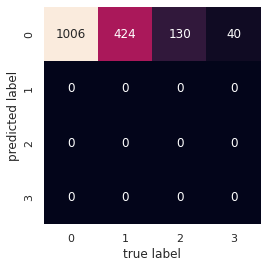

In [ ]:

labels = np.zeros_like(y_kmeans)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data2["CDRGLOB"], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
     

**TASK-12E: Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means.**

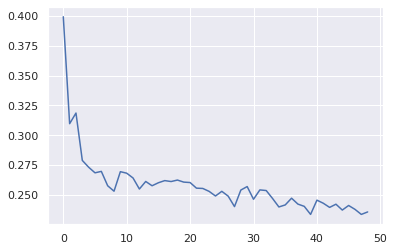

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
list_SS = []
for no_clusters in range(2,51):

    clusterer = KMeans(n_clusters=no_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(fit)

    silhouette_avg = silhouette_score(fit, cluster_labels)
    list_SS.append(silhouette_avg)
plt.plot(list_SS)

In [ ]:
kmeans=KMeans(n_clusters=7,random_state=42)
k_means_=kmeans.fit_predict(fitted)

In [ ]:
k_means_

array([0, 1, 0, ..., 1, 0, 3], dtype=int32)

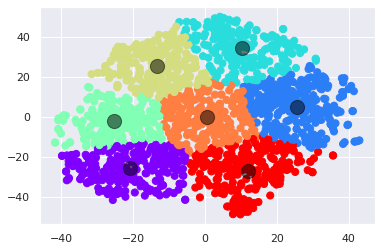

In [ ]:
plt.scatter(fitted[:, 0], fitted[:, 1], c=k_means_, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()


**TASK-12F: Please use the final dataset but this time add the following columns and then run the model with grid search optimization:SEX INDEPEND NPISCORE FAQ**

In [ ]:
data3=data2[['SEX', 'INDEPEND', 'NPISCORE', 'FAQ']]
data4=np.concatenate((conc_arr,data3),axis=1)


In [ ]:
data4.shape

(1600, 22)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data4, y, test_size=0.25, random_state=42)
param_grid_rf = {
    'n_estimators' : [10,50,100],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [2,4,6]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True)
grid.fit(X_train, y_train)
grid.best_params_
grid_pred = grid.predict(X_test)

print(accuracy_score(y_test, grid_pred))

0.83


**TASK-12G: Then for comparison purposes, use only these four columns to develop a model):
SEX INDEPEND NPISCORE FAQ**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data3, y, test_size=0.25, random_state=42)
param_grid_rf = {
    'n_estimators' : [10,50,100],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [2,4,6]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True)
grid.fit(X_train, y_train)
grid.best_params_
grid_pred = grid.predict(X_test)

print(accuracy_score(y_test, grid_pred))

0.8425
